# 1. download pickle file

In [1]:
cd ./data/

/home/doyoung/deeplearning/data


In [4]:
# https://www.cs.toronto.edu/~kriz/cifar.html
wget https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
tar -xvzf file_name

SyntaxError: invalid syntax (<ipython-input-4-bb3042964c67>, line 2)

In [5]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [19]:
datapath = 'cifar10/cifar-10-batches-py/'
train_file=['data_batch_1','data_batch_2', 'data_batch_3', 'data_batch_4', 'data_batch_5']
test_file=['test_batch']
list_class=['airplane', 'automobile', 'birds', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
n_classes = len(list_class)

In [28]:
data = unpickle(datapath+train_file[0])

print(type(data))
for val in data.keys():
    print(val)
    

print(data[b'labels'][0])
print(list_class[data[b'labels'][0]])
print(data[b'filenames'][0])
print(data[b'batch_label'][0])
print(data[b'data'][0])



<class 'dict'>
b'data'
b'labels'
b'filenames'
b'batch_label'
6
frog
b'leptodactylus_pentadactylus_s_000004.png'
116
[ 59  43  50 ..., 140  84  72]


In [31]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

In [33]:
reshape_img = np.reshape(data[b'data'][0], [3, 32, 32])

In [39]:
img = np.transpose(reshape_img, (1,2,0))
img.shape

(32, 32, 3)

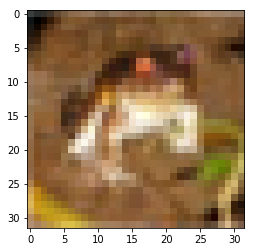

In [46]:
plt.imshow(img)

# 2. download binary file

In [48]:
wget https://www.cs.toronto.edu/~kriz/cifar-10-binary.tar.gz
tar -xvzf file_name

x : 묶음을 해제
c : 파일을 묶음
v : 묶음/해제 과정을 화면에 표시
z : gunzip을 사용
f : 파일 이름을 지정
p : 권한(permission)을 원본과 동일하게 유지
    
    -c : tar파일 생성할 때 사용 (기본사용)  -> 풀때는 -x 옵션 사용
-t : tar파일의 내용을 확인할 때 사용
-f : tar파일을 사용할 때 사용 (기본사용)
-p : tar파일을 생성or풀때 원본 파일속성(퍼미션) 유지
-v : 묶거나 풀 때 과정 보기 (거의기본사용)
-z : gzip(gunzip) 사용 옵션
-j : bzip(bunzip2) 사용 옵션

    
gzip(gunzip) 사용해서 압축
묶고압축    tar -cvfz 파일명.tar.gz 파일(디렉토리)
묶고압축된 파일 보기  tar -tvfz 파일명.tar.gz 파일(디렉토리)
묶고압축된파일 풀기   tar -xvfz 파일명.tar.gz 파일(디렉토리)

gzip(gunzip) 사용 및 퍼미션유지해서 압축
묶고압축    tar -cvfpz 파일명.tar.gz 파일(디렉토리) -> 가장좋음
묶고압축된 파일 보기  tar -tvfpz 파일명.tar.gz 파일(디렉토리)
묶고압축된파일 풀기   tar -xvfpz 파일명.tar.gz 파일(디렉토리) -> 가장좋음
http://jsigoogle.tistory.com/entry/%EC%9C%A0%EB%8B%89%EC%8A%A4-%EC%95%95%EC%B6%95-gzip-gunzip
    


SyntaxError: invalid syntax (<ipython-input-48-b40a70560d23>, line 1)

In [ ]:
#CIFAR 데이터 읽어오기 
def read_dataset(filename_queue):
    class DataRecord(object):
        pass
    
    result = DataRecord()
    
    label_bytes = LABEL_BYTES
    result.height = INPUT_SIDE
    result.width = INPUT_SIDE
    result.depth = N_CHANNEL
    image_bytes = result.height * result.width * result.depth
    record_bytes = label_bytes + image_bytes
    
    reader = tf.FixedLengthRecordReader(record_bytes = record_bytes)
    result.key, value = reader.read(filename_queue)
    print (value)
    record_bytes = tf.decode_raw(value, tf.uint8)
    
    result.label = tf.cast(tf.strided_slice(record_bytes, [0], [label_bytes]), tf.int32) #input, begin, end로 잘라냄 > 0~1
    
    depth_major = tf.reshape(tf.strided_slice(record_bytes, [label_bytes], # 1부터 image_bytes까지 image를 잘라낸 후 
                                              [label_bytes + image_bytes]), #channel x height x width로 변환함.
                             [result.depth, result.height, result.width])
    
    result.uint8image = tf.transpose(depth_major, [1,2,0]) #channel x height x width >>> height x width x chennl로 변경
    
    return result

#label, image 세팅해줌 
def _generate_image_and_label_batch(image, label, min_queue_examples,
                                    batch_size, shuffle):
    """Construct a queued batch of images and labels.
    Args:
      image: 3-D Tensor of [height, width, 3] of type.float32.
      label: 1-D Tensor of type.int32
      min_queue_examples: int32, minimum number of samples to retain
        in the queue that provides of batches of examples.
      batch_size: Number of images per batch.
      shuffle: boolean indicating whether to use a shuffling queue.
    Returns:
      images: Images. 4D tensor of [batch_size, height, width, 3] size.
      labels: Labels. 1D tensor of [batch_size] size.
    """
    # Create a queue that shuffles the examples, and then
    # read 'batch_size' images + labels from the example queue.
    num_preprocess_threads = 16 #프로세스 스레드 
    if shuffle: #셔플 하면 
        images, label_batch = tf.train.shuffle_batch([image, label],
            batch_size=batch_size,
            num_threads=num_preprocess_threads,
            capacity=min_queue_examples + 3 * batch_size,
            min_after_dequeue=min_queue_examples) #이거만 해주면 batch와 동일함. 
    #Minimum number elements in the queue after a dequeue, used to ensure a level of mixing of elements.
    else:
        images, label_batch = tf.train.batch([image, label],
            batch_size=batch_size,
            num_threads=num_preprocess_threads,
            capacity=min_queue_examples + 3 * batch_size)

    # Display the training images in the visualizer.
    tf.summary.image('images', images) #걍 보드용인듯

    return images, tf.reshape(label_batch, [batch_size])


def distorted_inputs(data_dir, batch_size): #좀 드럽게 인풋받아오기 
    """Construct distorted input for CIFAR training using the Reader ops.
    Args:
      data_dir: Path to the CIFAR-10 data directory.
      batch_size: Number of images per batch.
    Returns:
      images: Images. 4D tensor of [batch_size, IMAGE_SIZE, IMAGE_SIZE, 3] size.
      labels: Labels. 1D tensor of [batch_size] size.
    """
    filenames = [os.path.join(data_dir, 'data_batch_%d.bin' % i) for i in range(1, 6)] 
    for f in filenames:
        if not tf.gfile.Exists(f):
            raise ValueError('Failed to find file: ' + f)

    # Create a queue that produces the filenames to read.
    filename_queue = tf.train.string_input_producer(filenames)

    # Read examples from files in the filename queue.
    read_input = read_dataset(filename_queue)
    reshaped_image = tf.cast(read_input.uint8image, tf.float32)

    height = INPUT_SIDE
    width = INPUT_SIDE

    # Image processing for training the network.  Note the many random
    # distortions applied to the image.

    # Randomly crop a [height, width] section of the image.
    distorted_image = tf.random_crop(reshaped_image, [height, width, 3]) # 랜덤으로 이미지를 크롭 h x w x c

    # Randomly flip the image horizontally.
    distorted_image = tf.image.random_flip_left_right(distorted_image) # 또 랜덤으로 좌우 플립 random_flip_up_down도 있긴 함
    #이런 느낌..? 으로 맥스텔타가지고 유니폼으로 어쩌구저쩌구
    #delta = random_ops.random_uniform([], -max_delta, max_delta, seed=seed)
    #return adjust_brightness(image, delta)

    # Because these operations are not commutative, consider randomizing
    # the order their operation.
    distorted_image = tf.image.random_brightness(distorted_image,    #랜덤으로 밝기 조절 
                                               max_delta=63)
    distorted_image = tf.image.random_contrast(distorted_image,      #콘트라스트 조절 랜덤. 기존 픽셀값의 최소 0.2 최대 1.8
                                             lower=0.2, upper=1.8)

    # Subtract off the mean and divide by the variance of the pixels.
    float_image = tf.image.per_image_standardization(distorted_image) #표준화시킴. mean으로빼고 var로 나눔

    # Set the shapes of tensors.
    float_image.set_shape([height, width, 3])
    read_input.label.set_shape([1])

    # Ensure that the random shuffling has good mixing properties.
    min_fraction_of_examples_in_queue = 0.4
    min_queue_examples = int(NUM_EXAMPLES_PER_EPOCH * min_fraction_of_examples_in_queue)
    print('Filling queue with %d CIFAR images before starting to train. '
         'This will take a few minutes.' % min_queue_examples)

    # Generate a batch of images and labels by building up a queue of examples.
    return _generate_image_and_label_batch(float_image, read_input.label,
                                         min_queue_examples, batch_size,
                                         shuffle=True)


def inputs(eval_data, data_dir, batch_size):
    """Construct input for CIFAR evaluation using the Reader ops.
    Args:
    eval_data: bool, indicating if one should use the train or eval data set.
    data_dir: Path to the CIFAR-10 data directory.
    batch_size: Number of images per batch.
    Returns:
    images: Images. 4D tensor of [batch_size, IMAGE_SIZE, IMAGE_SIZE, 3] size.
    labels: Labels. 1D tensor of [batch_size] size.
    """
    if not eval_data:
        filenames = [os.path.join(data_dir, 'data_batch_%d.bin' % i)
                     for i in xrange(1, 6)]
        num_examples_per_epoch = NUM_EXAMPLES_PER_EPOCH
    else:
        filenames = [os.path.join(data_dir, 'test_batch.bin')]
        num_examples_per_epoch = NUM_TESTSET_PER_EPOCH

    for f in filenames:
        if not tf.gfile.Exists(f):
             raise ValueError('Failed to find file: ' + f)

    # Create a queue that produces the filenames to read.
    filename_queue = tf.train.string_input_producer(filenames)

    # Read examples from files in the filename queue.
    read_input = read_dataset(filename_queue)
    reshaped_image = tf.cast(read_input.uint8image, tf.float32)

    height = INPUT_SIDE
    width = INPUT_SIDE

    # Image processing for evaluation.
    # Crop the central [height, width] of the image.
    resized_image = tf.image.resize_image_with_crop_or_pad(reshaped_image,
                                                         height, width)

    # Subtract off the mean and divide by the variance of the pixels.
    float_image = tf.image.per_image_standardization(resized_image)

    # Set the shapes of tensors.
    float_image.set_shape([height, width, 3])
    read_input.label.set_shape([1])

    # Ensure that the random shuffling has good mixing properties.
    min_fraction_of_examples_in_queue = 0.4
    min_queue_examples = int(NUM_EXAMPLES_PER_EPOCH * min_fraction_of_examples_in_queue)

    # Generate a batch of images and labels by building up a queue of examples.
    return _generate_image_and_label_batch(float_image, read_input.label,
                                         min_queue_examples, batch_size,
                                         shuffle=False)


print("FUNCTIONS READY")